In [4]:
import geopandas as gpd

In [6]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.head()


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"(POLYGON ((180 -16.06713266364245, 180 -16.555..."
1,53950935,Africa,Tanzania,TZA,150600.0,POLYGON ((33.90371119710453 -0.950000000000000...
2,603253,Africa,W. Sahara,ESH,906.5,POLYGON ((-8.665589565454809 27.65642588959236...
3,35623680,North America,Canada,CAN,1674000.0,"(POLYGON ((-122.84 49.00000000000011, -122.974..."
4,326625791,North America,United States of America,USA,18560000.0,"(POLYGON ((-122.84 49.00000000000011, -120 49...."


In [12]:
world.geometry.name
world = world.rename(columns={'geometry': 'borders'}).set_geometry('borders')
world.geometry.name
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,borders
0,920938,Oceania,Fiji,FJI,8374.0,"(POLYGON ((180 -16.06713266364245, 180 -16.555..."
1,53950935,Africa,Tanzania,TZA,150600.0,POLYGON ((33.90371119710453 -0.950000000000000...
2,603253,Africa,W. Sahara,ESH,906.5,POLYGON ((-8.665589565454809 27.65642588959236...
3,35623680,North America,Canada,CAN,1674000.0,"(POLYGON ((-122.84 49.00000000000011, -122.974..."
4,326625791,North America,United States of America,USA,18560000.0,"(POLYGON ((-122.84 49.00000000000011, -120 49...."


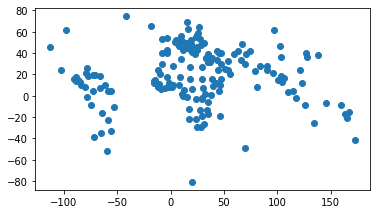

In [14]:
world['centroid_column'] = world.centroid

world = world.set_geometry('centroid_column')

world.plot();

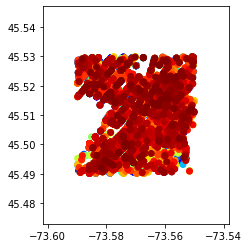

In [260]:
import fiona

file = gpd.read_file("C:\\Users\\atomi\\Desktop\\AAAA\\crime_dt.shp")
file.head()
file.geometry.name

file['centroid_column'] = file.centroid
file = file.set_geometry('centroid_column')
file.plot();

In [211]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


file2 = gpd.read_file("C:\\Users\\atomi\\Desktop\\AAAA\\crime_dt.shp")
file2.head()

#file2.plot(color = 'yellow', edgecolor="red",alpha=0.5,figsize=(12,12),scheme='quantiles',legend=True)

dataframe = file2.geometry
df = pd.DataFrame()
df['lat'] = dataframe.geometry.x
df['long'] = dataframe.geometry.y


In [263]:
group_value = df.groupby(['lat','long']).size().reset_index(name='counts')
mean = group_value['counts'].mean(axis=0)
stddev = group_value['counts'].std(axis=0)
group_value.sort_values(['lat'],axis=0, 
                 ascending=True, inplace=True)
group_value


,lat,long,counts
0,-73.589831,45.520930,13
1,-73.589795,45.516251,4
2,-73.589780,45.495267,1
3,-73.589704,45.493143,4
4,-73.589686,45.492837,5
...,...,...,...
1172,-73.550296,45.528171,15
1173,-73.550281,45.529733,3
1174,-73.550261,45.511094,17
1175,-73.550058,45.511047,11


In [334]:
min = group_value.lat.min()
max = group_value.lat.max()

#form = pd.DataFrame()
#form = group_value[group_value.lat > (min + 0.002)] 
#form
sum = max + min
print(str(max) + ' ' +str(min) + ' ' + str(sum))
new_val = group_value[(group_value.lat >= min - 0.0002) & (group_value.lat < min + 0.0002)]['counts'].sum()
new_val

-73.550049191 -73.58983070149999 -147.1398798925


35

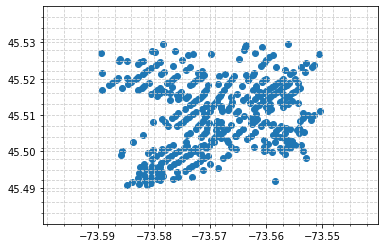

In [291]:
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
min_x = group_value.lat.min()
max_x = group_value.lat.max()
min_y = group_value.long.min()
max_y = group_value.long.max()

axes = plt.gca()

additive = 0.01
multiplicator = 0.003
axes.set_xlim([min_x- additive ,max_x+additive])
axes.set_ylim([min_y-additive,max_y+additive])

axes.xaxis.set_minor_locator(MultipleLocator(multiplicator))
axes.yaxis.set_minor_locator(MultipleLocator(multiplicator))
axes.xaxis.set_major_locator(MultipleLocator(additive))
axes.yaxis.set_major_locator(MultipleLocator(additive))

#xticks = np.arange(min_x,max_x,0.002)
#yticks = np.arange(min_y,max_y,0.002)
#axes.set_xticks(xticks)
#axes.set_yticks(yticks)

axes.grid(which='minor', color='#CCCCCC', linestyle='--')
axes.grid(which='major', color='#CCCCCC', linestyle='--')
plt.scatter(above_mean.lat,above_mean.long)

plt.show()


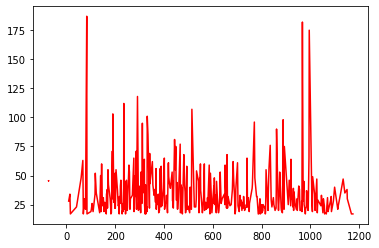

In [259]:
lat_grouping = df.groupby(['long']).size().reset_index(name='counts')
lat_grouping

above_mean = group_value[group_value.counts > mean]
plt.plot(above_mean.lat, above_mean.long, above_mean.counts)

 